In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from glob import glob

# Set plot font to serif
rcParams['font.family'] = 'serif'
plt.rc('font', size=14)
plt.rc('axes', labelsize=16)

# Set color variables to make colors easier later
lightblue = '#54d2d2'
yellow = '#ffcb00'
orange = '#f8aa4b'
pink = '#ff6150'
gray = '#a89cac'

In [ ]:
# define some dictionaries to make it easy to loop over metallicities

cc = {'mw': pink,
      'lmc': orange,
      'smc': yellow,
      'izw': lightblue}

ldict = {'mw': 'Z = 0.014',
         'lmc': 'Z = 0.006',
         'smc': 'Z = 0.002',
         'izw': 'Z = 0.0002'}

folderdict = {'mw': '014',
             'lmc': '006',
             'smc': '002',
             'izw': '0002'}

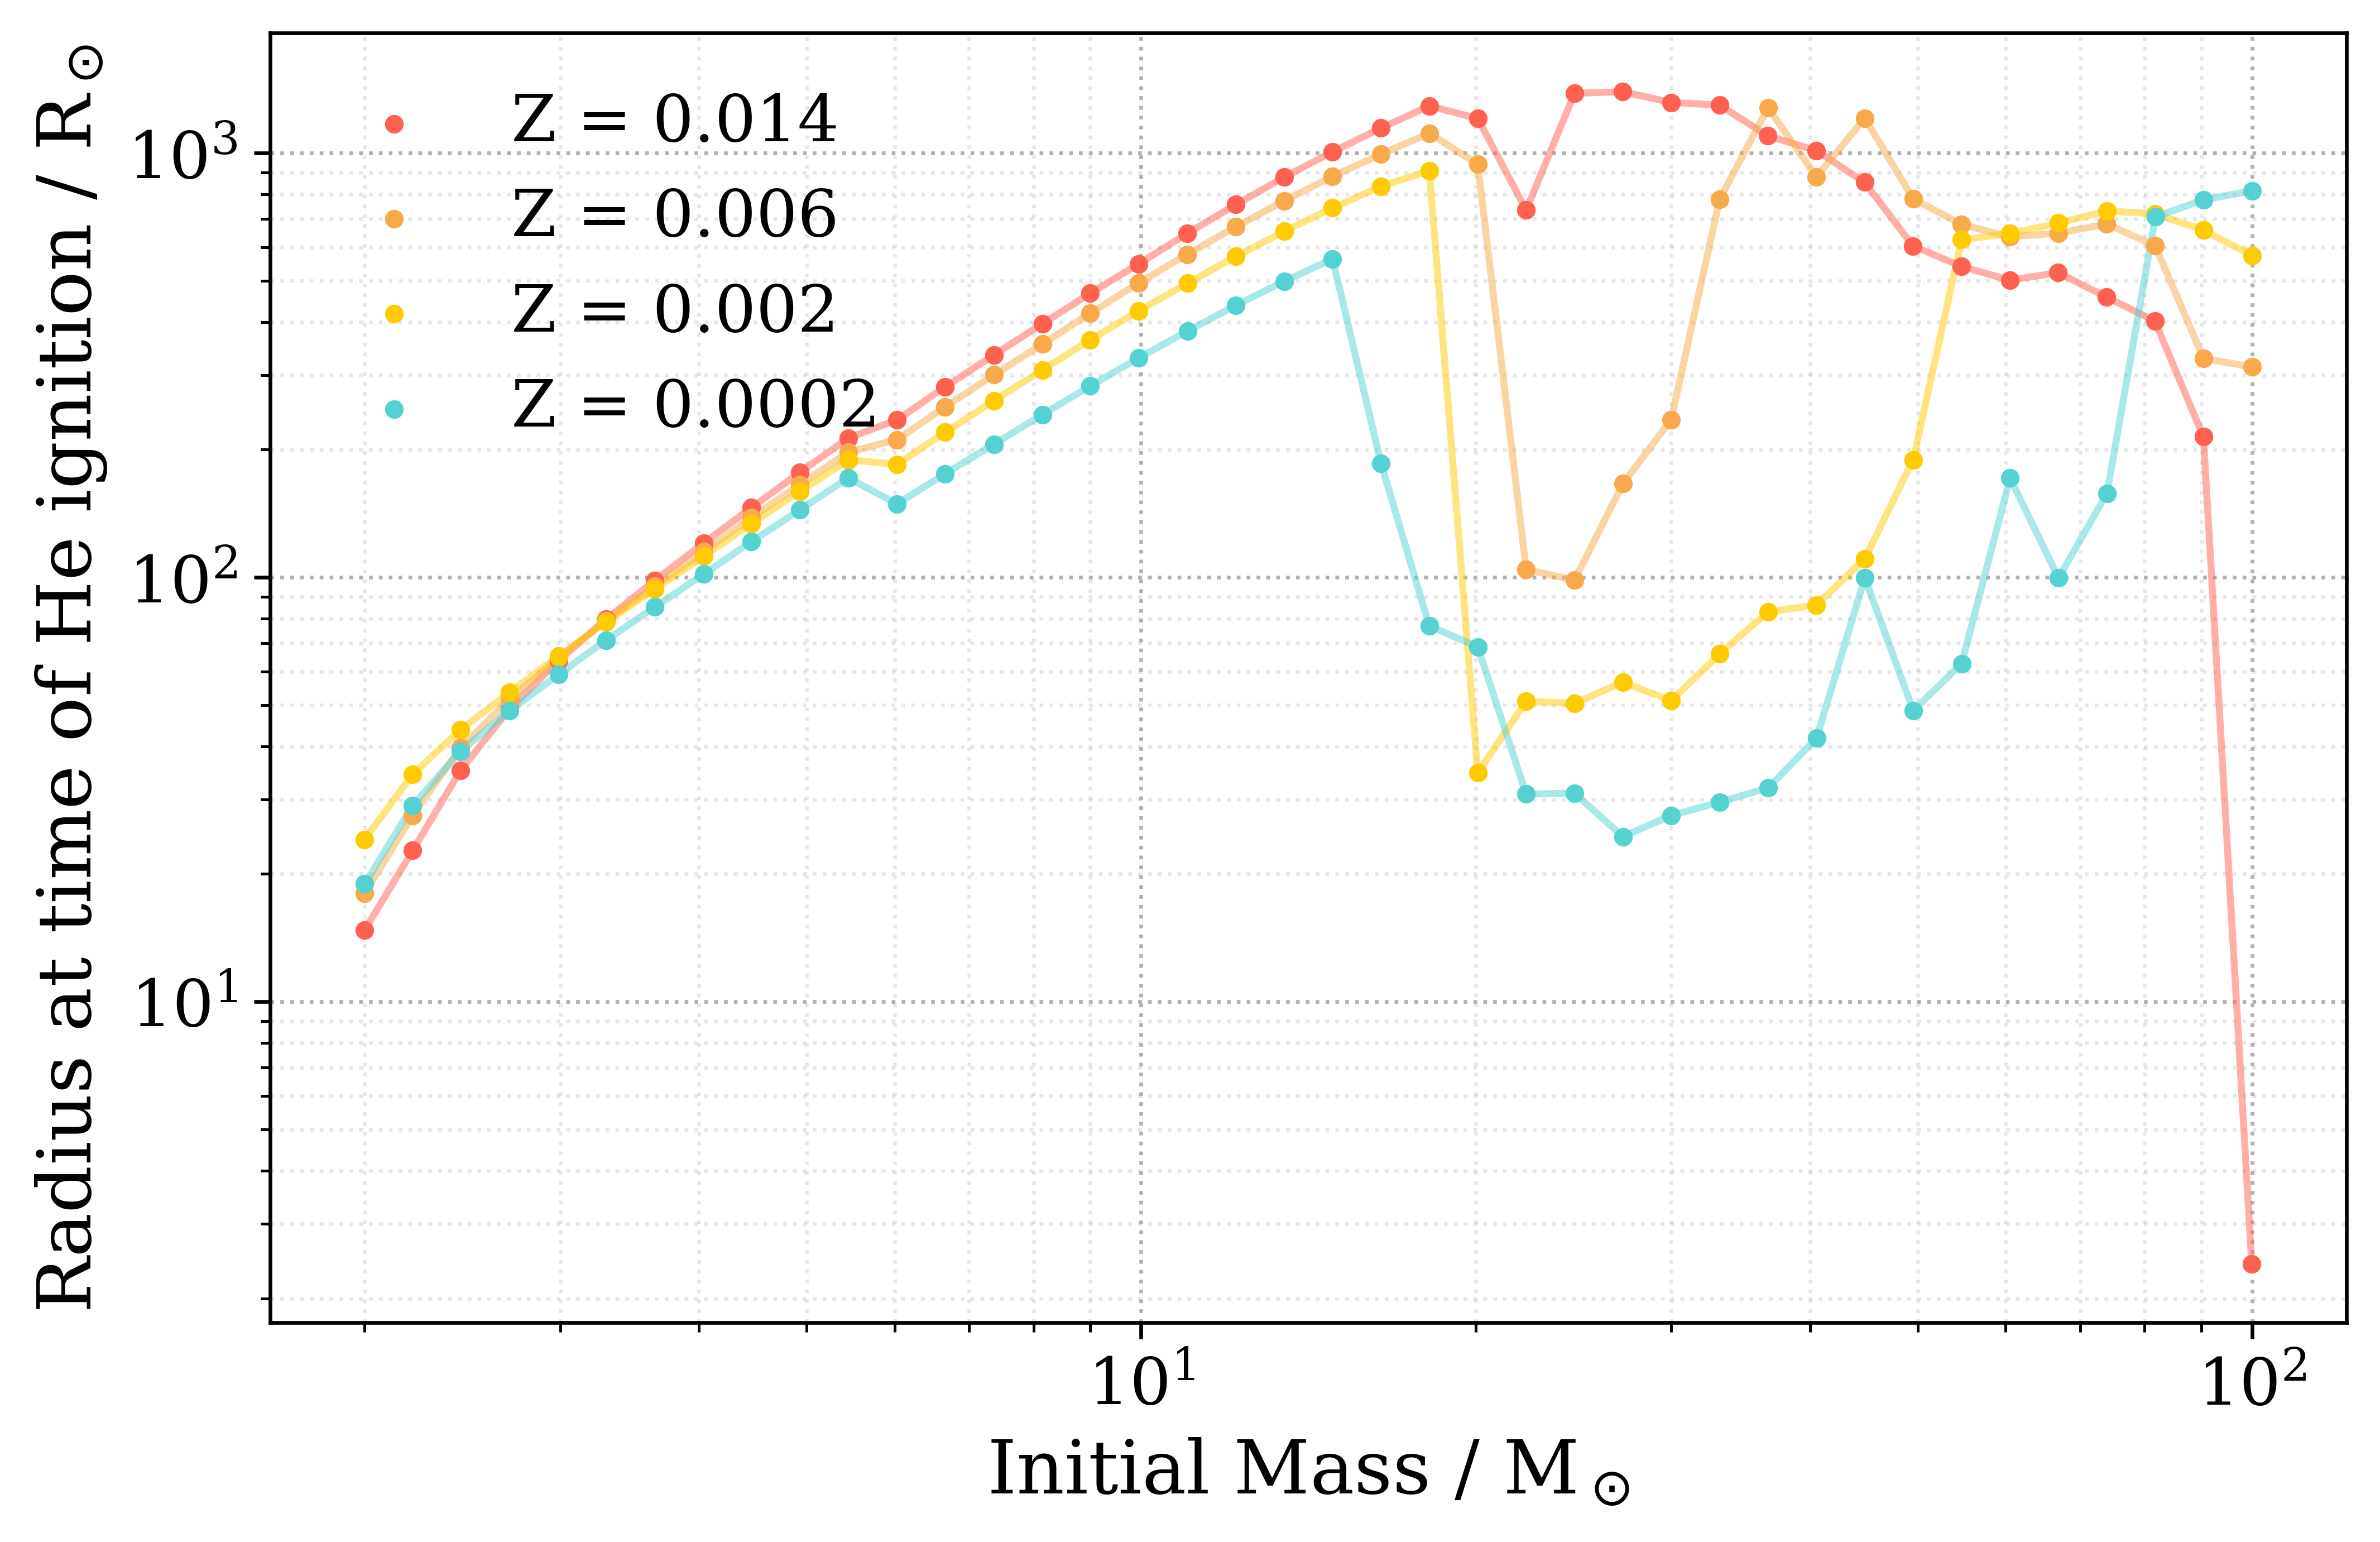

In [10]:
fig, ax = plt.subplots(1, 1, dpi=600, figsize=(8, 5))

# plot each metallicity
for l, env in enumerate(cc.keys()):
    # find the history file for each single star MESA model
    fnames = glob(f'../../data/model_grids/history_single_{folderdict[env]}/*/LOGS/history_mson.data')

    # define empty dictionaries to store mass and radius values
    mass = np.zeros(len(fnames))
    radius = np.zeros(len(fnames))

    for i, filename in enumerate(fnames):
        df = pd.read_csv(filename, sep=r'\s+', skiprows=5)
        # find the point in the history file where helium ignites in the core
        # when the fraction of H1 is below 1% and He4 first decreases below 97%
        mask = (df.center_h1 < 0.01) * (df.center_he4 < 0.97)
        # get the mass and radius values at that point
        mass[i] = np.round(df.star_mass[0], 2)
        radius[i] = 10**(np.array(df.log_R)[mask][0])
    # order mass and radius to plot
    mass, radius = zip(*sorted(zip(mass, radius)))
    ax.plot(mass, radius, c=cc[env], alpha=0.5)
    ax.scatter(mass, radius, c=cc[env], marker='.', zorder=100, label=ldict[env])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Initial Mass / M$_\odot$')
ax.set_ylabel(r'Radius at time of He ignition / R$_\odot$')

ax.grid(which='major', ls=':')
ax.grid(which='minor', ls=':', alpha=0.3)

plt.legend(frameon=False, loc='upper left')

plt.savefig('R_at_He_ignition.png', bbox_inches='tight')